# Description

evaluation based on:
- scaling with size of input
- scaling with data size
- scaling with number of runs

- no two hotels in the same place
- the fact that the coordinates reach around earth does not matter

## get dev data

In [1]:
import os
import sys
import shutil
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
sys.path.append("..")
from test_framework import comparison_test

In [3]:
datadir = '../data_sources/hotels_data'
if not os.path.exists(datadir):
    os.makedirs(datadir)


put as much as you need of this to datadir

https://www.dropbox.com/sh/2ebfiuzau02ns6y/AABNPprCbIiqoS2tcVFUfm14a?dl=0

## evaluate solutions on dev data

#### create testinputs

In [4]:
AGGED = pd.read_csv(datadir + '/agg.csv',index_col='index')

In [5]:
def generate_input(input_size):
    input_list = []
    for _ in range(input_size):
        input_dic = {c:np.random.uniform(AGGED.loc['min',c],AGGED.loc['max',c]) for c in AGGED.columns}
        input_dic['stars'] = np.linspace(0,5,11)[np.random.randint(11)]
        prices = np.sort( np.random.exponential(70,size=2))
        input_dic['min_price'] = prices[0]
        input_dic['max_price'] = prices[1]
        input_list.append(input_dic.copy())
    return input_list



In [6]:
envdir = 'env_dir'
stagedir = 'staging'

In [8]:
MINI_DATA = [3e3,6e3,12e3]
SMALL_DATA = [3e4,6e4,30e4,60e4]
BIG_DATA = [3e6,6e6,12e6,24e6,36e6,48e6,60e6]

use_datasets = MINI_DATA
data_dicts = {int(data_size):{'datafile':datadir + '/hotels-%d.csv' % data_size,
'staging_folder':stagedir} for data_size in use_datasets}


input_sizes = [1]#,200]#,200,1000]
reps = 5

input_set = {}
for data_name in data_dicts.keys():
    input_set[data_name] = {}
    for input_size in input_sizes:
        input_set[data_name][input_size] = [generate_input(input_size) 
                                            for _ in range(reps)]

In [12]:
WINDOWS = True #if false it assumes unix
timedata,out_dfs = comparison_test(data_dicts,input_set,
                                   envdir,stagedir,
                                   is_windows=WINDOWS,
                                  verbose=True)

a_kula


Starting ETL process
ETL process started
ETL process done
Starting cleanup process
cleanup process started
cleanup process done
ETL killed
Starting ETL process
ETL process started
ETL process done
Starting cleanup process
cleanup process started
cleanup process done
ETL killed
Starting ETL process
ETL process started
ETL process done
Starting cleanup process
cleanup process started
cleanup process done
ETL killed
base_solution


KeyboardInterrupt: 

In [20]:
similarity = []

for id1,solution1 in enumerate(list(out_dfs.keys())[:-1]):
    _df1 = out_dfs[solution1]
    solution2 = list(out_dfs.keys())[id1+1]
    _df2 = out_dfs[solution2]
    print('----------\n%s:\n' % solution1,_df1[_df1 != _df2].unstack().dropna())
    print('----------\n%s:\n' % solution2,_df2[_df1 != _df2].unstack().dropna())
    similarity.append({
        'solution1':solution1,
        'solution2':solution2,
        'similarity':(_df1 == _df2).mean().mean()
    })
pd.DataFrame(similarity).sort_values('similarity')

----------
a_maybe_really_better_solution:
 Series([], dtype: object)
----------
base_solution:
 Series([], dtype: object)


,similarity,solution1,solution2
0,1.0,a_maybe_really_better_solution,base_solution


In [21]:
input_set

{3000: {1: [[{'lat': 39.767497466083555,
     'lon': -84.32469451859447,
     'stars': 4.5,
     'min_price': 17.709104295245858,
     'max_price': 164.83378018115047}]]},
 6000: {1: [[{'lat': 6.790026159635751,
     'lon': -8.904456938867469,
     'stars': 3.5,
     'min_price': 40.19150287017451,
     'max_price': 72.871516289113}]]},
 12000: {1: [[{'lat': 60.57303762221102,
     'lon': 173.65817570106103,
     'stars': 3.0,
     'min_price': 10.763187893337689,
     'max_price': 81.0018847709269}]]}}

In [22]:
_df1

,lat,lon,name,price,stars,input_id,data_id
0,38.622125,-90.270555,The Westin St. Louis - rbnb 68,109.158950,4.5,1,3000
0,6.423169,3.436378,Signature Suites Victoria Island - rbnb 80,67.699728,3.5,1,6000
0,42.962940,144.311475,Hotel Areaone Kushiro - rbnb 192,38.374559,3.0,1,12000


In [23]:
_df2

,lat,lon,name,price,stars,input_id,data_id
0,38.622125,-90.270555,The Westin St. Louis - rbnb 68,109.158950,4.5,1,3000
0,6.423169,3.436378,Signature Suites Victoria Island - rbnb 80,67.699728,3.5,1,6000
0,42.962940,144.311475,Hotel Areaone Kushiro - rbnb 192,38.374559,3.0,1,12000


In [24]:
timedf = pd.DataFrame(timedata).pivot_table(columns='solution',values='calc_time',
                                   index=['data_id','input_id'],aggfunc='median').reset_index()

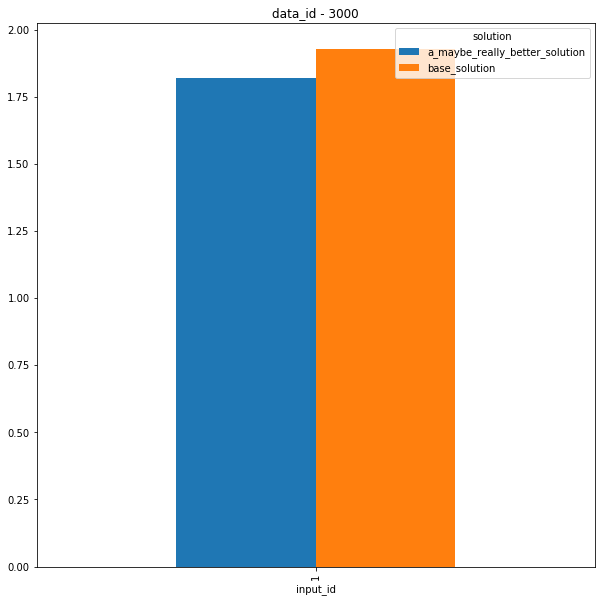

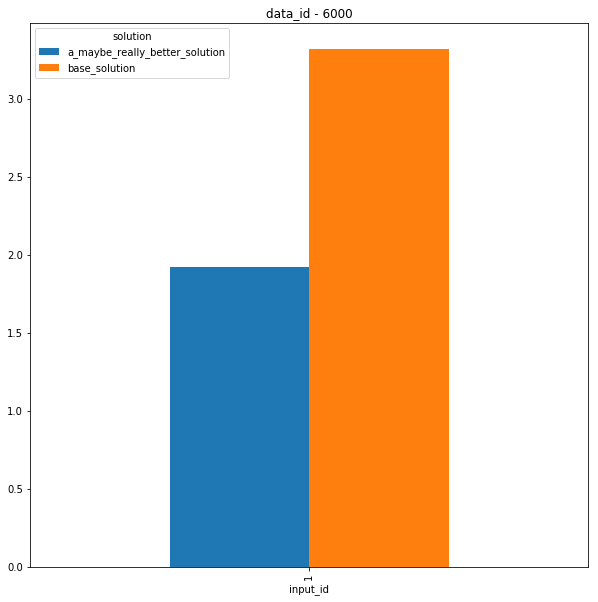

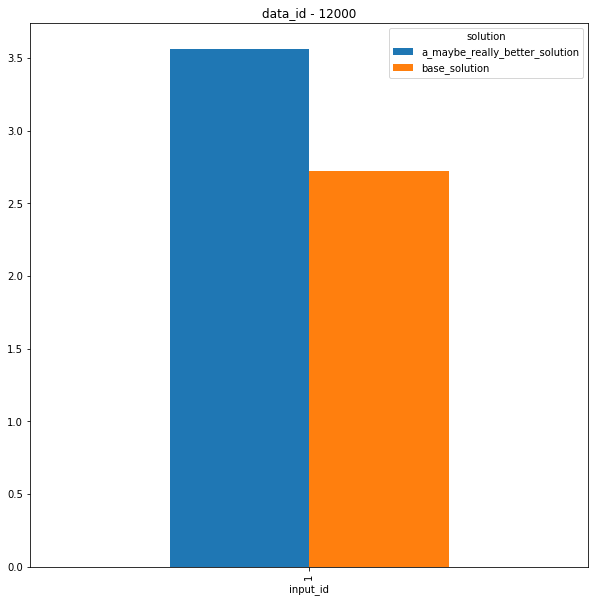

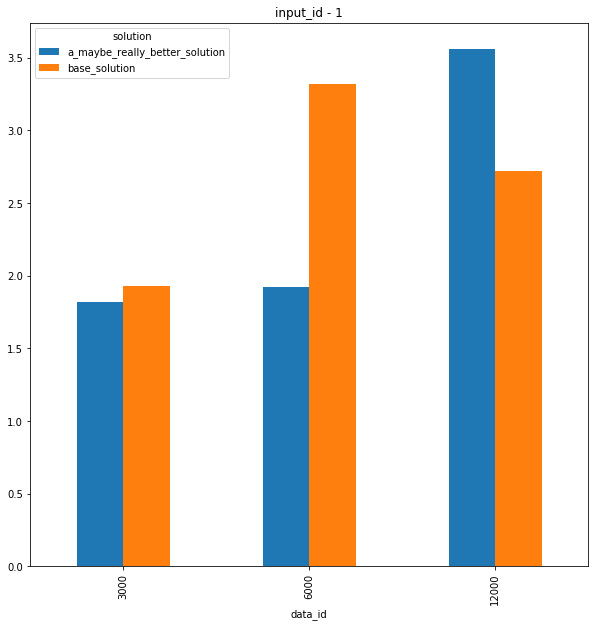

In [25]:
allgroups = ['data_id','input_id']
for basegroup in allgroups:
    remaingroup = [c for c in allgroups if c != basegroup]
    for _gname,_gdf in timedf.groupby(basegroup):
        _gdf.drop(basegroup,axis=1).groupby(remaingroup).median()\
        .plot(kind='bar',figsize=(10,10),title='%s - %s' % (str(basegroup),str(_gname)))

In [ ]:
df30=pd.read_csv('hotels-3000.csv')

In [ ]:
df30

In [ ]:
df30=df30.drop_duplicates().sort_values(['stars','price'])

In [ ]:
df30

In [ ]:
df15=df30[df30['stars']==3]
df15
df15[df15['price']<150].sort_values(by='price')

In [ ]:
df30['stars'].sort_values().iloc[:]

In [ ]:
stars="stars"
stars2=25
stars+str(stars2)
df10=300

In [ ]:
('df%s' %str(int(10)))